In [5]:
import cv2
# import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

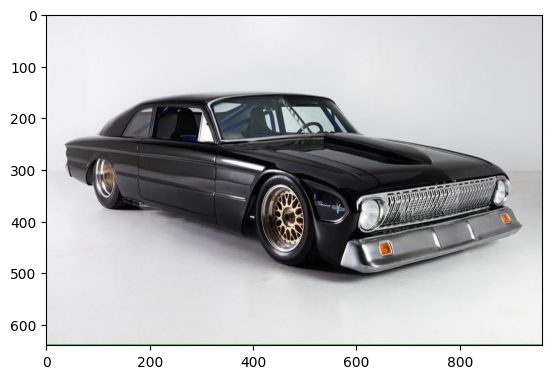

In [6]:
impath = 'data/car.jpg'
img = plt.imread(impath)
plt.imshow(img)

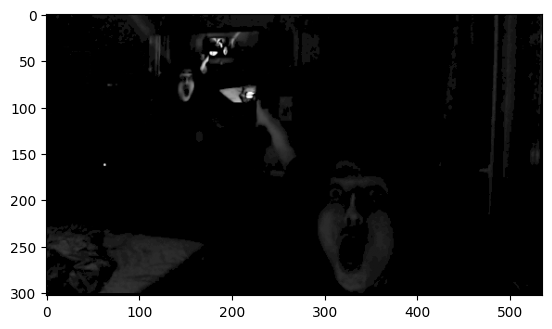

In [55]:
ivan_gray = cv2.imread('data/ivan.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(ivan_gray, cmap='grey')

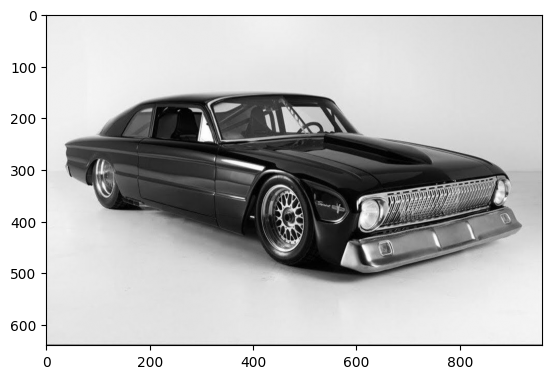

In [11]:
img_gray = cv2.imread(impath, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap='grey')

In [91]:
def filters(img):
    '''slide 56 in lecture_1
    6.4. Неидеальные НЧ/ВЧ фильтры'''
    rows, cols = img.shape
    mask = np.zeros((rows, cols), np.uint8)
    r = 50; cv2.circle(mask, (cols//2, rows//2), r, 1, -1)
    fshift = np.fft.fftshift(np.fft.fft2(img))
    res = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift*mask)))
    return res

def filters_2(img):
    '''slide 59 in lecture_1'''
    f = np.fft.fft2(img); fshift = np.fft.fftshift(f)
    mask = np.zeros(img.shape, np.uint8)
    r = 40; cv2.circle(mask, (img.shape[1]//2, img.shape[0]//2), r, 1, -1)
    filtered = fshift * mask
    img_back = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered)))
    return img_back

def conv(img):
    '''def conv from slide 7 in lecture_1'''
    kernel = np.array([[1,1,1],[1,-8,1],[1,1,1]], np.float32)
    edges = cv2.filter2D(img, -1, kernel)
    return edges

def adjust(img, alpha=1.2, beta=20):
    '''slide 14 in lecture_1'''
    # alpha, beta = 1.2, 20
    adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return adjusted

def process(img):
    '''slide 20 in lecture_1'''
    norm = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    equalized = cv2.equalizeHist(norm)
    clahe = cv2.createCLAHE(3.0,(8,8))
    result = clahe.apply(equalized)
    return result

def box_filter(img):
    '''slide 6 in lecture_2'''
    blur_5 = cv2.blur(img, (5, 5))
    k = np.ones((5,5), np.float32) / 25.0
    blur_manual = cv2.filter2D(img, -1, k)
    return blur_manual

def morph_grad(img):
    '''slide 37 in lecture_2'''
    kernel = cv2.getStructuringElement(
        cv2.MORPH_ELLIPSE, (5,5))
    eroded = cv2.erode(img, kernel, iterations=1)
    dilated = cv2.dilate(img, kernel, iterations=1)
    return dilated - eroded

def sobel(img):
    '''slide 43 in lecture_2'''
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=3)
    mag = cv2.magnitude(gx, gy)
    return mag

def contours(img):
    '''slide 48 in lecture_2'''
    # doesnt work, the code is not sufficient
    contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
    filtered = [c for c in contours if cv2.contourArea(c) > 100]
    approx = cv2.approxPolyDP(contour, epsilon=0.01*perimeter, closed=True)
    return approx

def imshow_gray(img, def_img=img_gray):
    if def_img is not None:
        fig, ax = plt.subplots(ncols=2, figsize= (10,5))
        ax[0].axis('off')
        ax[1].axis('off')
        ax[0].imshow(def_img, cmap='grey') 
        ax[1].imshow(img, cmap='grey')    
    else:
        plt.imshow(img, cmap='grey')

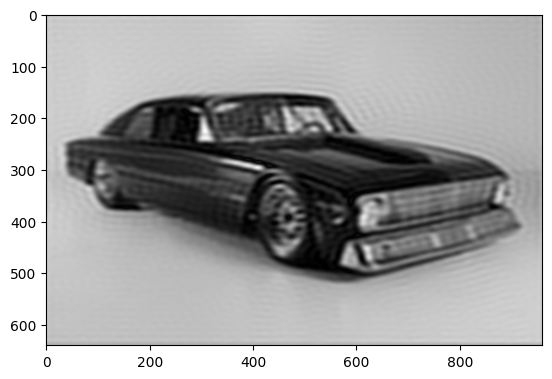

In [17]:
plt.imshow(filters(img_gray), cmap='grey')

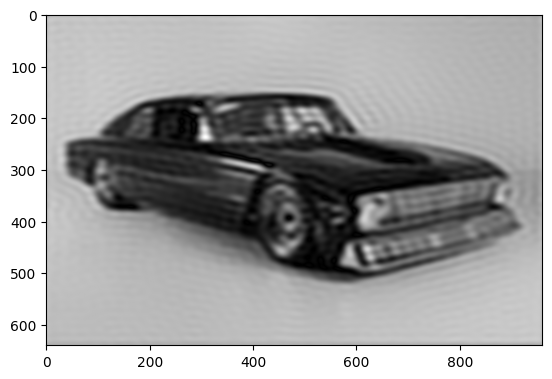

In [19]:
plt.imshow(filters_2(img_gray), cmap='grey')

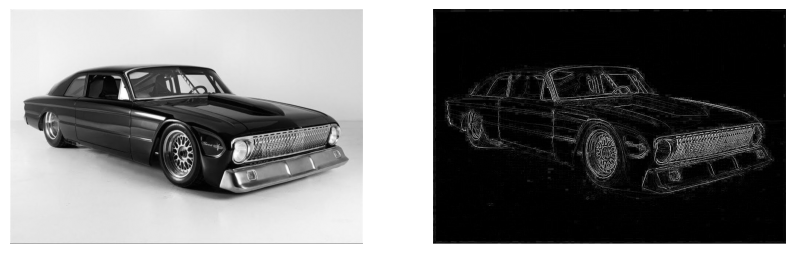

In [50]:
imshow_gray(conv(img_gray), img_gray)

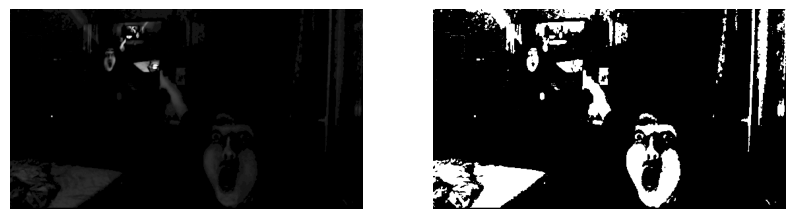

In [61]:
imshow_gray(adjust(ivan_gray, alpha=2, beta=220), ivan_gray)

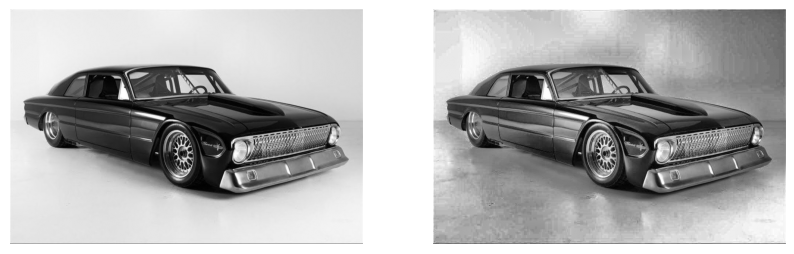

In [54]:
imshow_gray(process(img_gray))

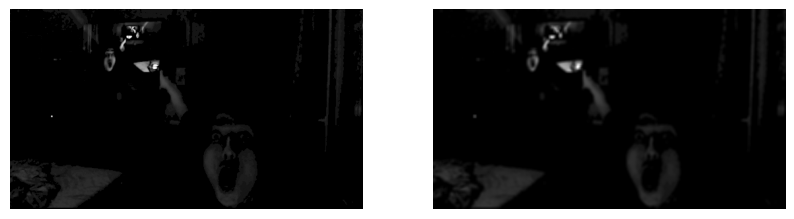

In [65]:
imshow_gray(box_filter(ivan_gray), ivan_gray)

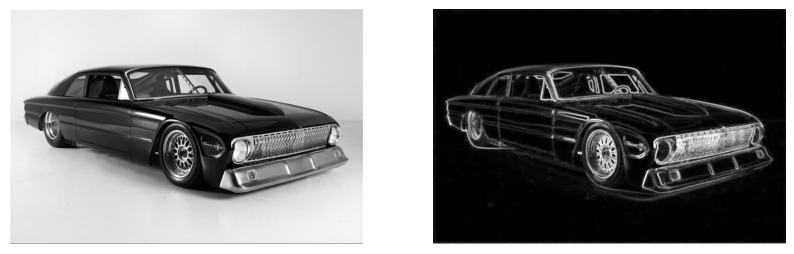

In [67]:
imshow_gray(morph_grad(img_gray))

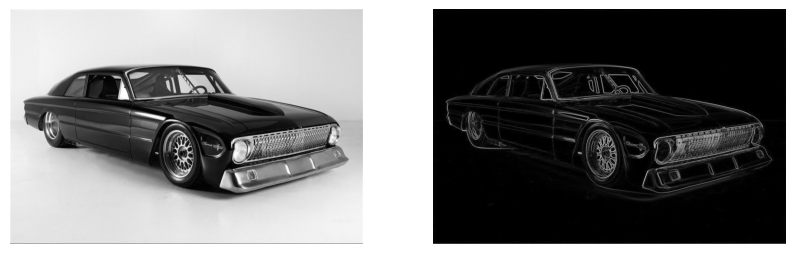

In [70]:
imshow_gray(sobel(img_gray))

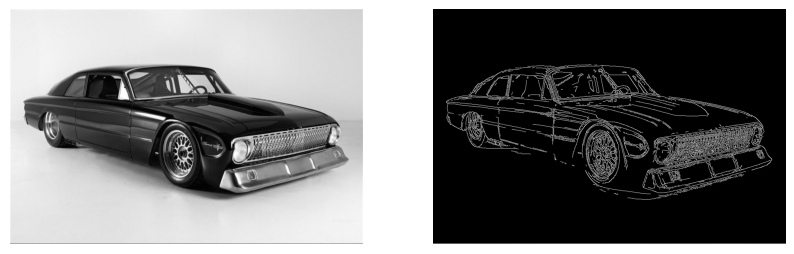

In [86]:
imshow_gray(cv2.Canny(img_gray, threshold1=100, threshold2=150))

In [88]:
imshow_gray(contours(img_gray))

NameError: name 'contour' is not defined